In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

pd.set_option("display.max_columns", 50)

In [2]:
## UPLOAD BREAST CANCER DATASET FROM PANDAS LIBRARY

In [3]:
breast_cancer = datasets.load_breast_cancer(as_frame=True)
breast_cancer_df = pd.concat((breast_cancer["data"], breast_cancer["target"]), axis=1)
breast_cancer_df["target"] = [breast_cancer.target_names[val] for val in breast_cancer_df["target"]]
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [4]:
## SETTING THE LAYOUT OF THE PAGE

In [5]:
st.set_page_config(layout="wide")
st.markdown("## Breast Cancer Stats")

2022-01-26 18:01:13.194 
  command:

    streamlit run C:\Users\paul\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [6]:
## SCATTER CHART

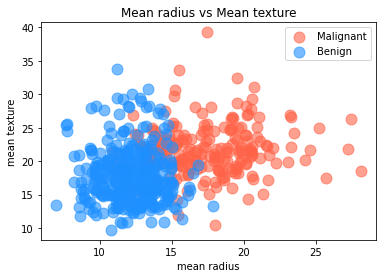

In [7]:
st.sidebar.markdown("### Scatter Chart: Explore Relationship Between Measurements :")

measurements = breast_cancer_df.drop(labels=["target"], axis=1).columns.tolist()

x_axis = st.sidebar.selectbox("X-Axis", measurements)
y_axis = st.sidebar.selectbox("Y-Axis", measurements, index=1)

if x_axis and y_axis:
    scatter_fig = plt.figure(figsize=(6,4))

    scatter_ax = scatter_fig.add_subplot(111)

    malignant_df = breast_cancer_df[breast_cancer_df["target"] == "malignant"]
    benign_df = breast_cancer_df[breast_cancer_df["target"] == "benign"]

    malignant_df.plot.scatter(x=x_axis, y=y_axis, s=120, c="tomato", alpha=0.6, ax=scatter_ax, label="Malignant")
    benign_df.plot.scatter(x=x_axis, y=y_axis, s=120, c="dodgerblue", alpha=0.6, ax=scatter_ax,
                           title="{} vs {}".format(x_axis.capitalize(), y_axis.capitalize()), label="Benign");


In [8]:
## SIDE BY SIDE BAR CHART

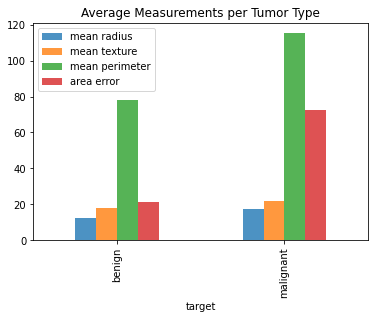

In [9]:
st.sidebar.markdown("### Bar Chart: Average Measurements Per Tumor Type : ")

avg_breast_cancer_df = breast_cancer_df.groupby("target").mean()
bar_axis = st.sidebar.multiselect(label="Average Measures per Tumor Type Bar Chart",
                                  options=measurements,
                                  default=["mean radius","mean texture", "mean perimeter", "area error"])

if bar_axis:
    bar_fig = plt.figure(figsize=(6,4))

    bar_ax = bar_fig.add_subplot(111)

    sub_avg_breast_cancer_df = avg_breast_cancer_df[bar_axis]

    sub_avg_breast_cancer_df.plot.bar(alpha=0.8, ax=bar_ax, title="Average Measurements per Tumor Type");

else:
    bar_fig = plt.figure(figsize=(6,4))

    bar_ax = bar_fig.add_subplot(111)

    sub_avg_breast_cancer_df = avg_breast_cancer_df[["mean radius", "mean texture", "mean perimeter", "area error"]]

    sub_avg_breast_cancer_df.plot.bar(alpha=0.8, ax=bar_ax, title="Average Measurements per Tumor Type");

In [10]:
## HISTOGRAM

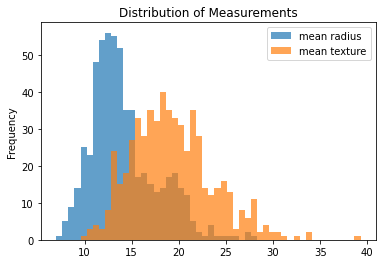

In [11]:
st.sidebar.markdown("### Histogram: Explore Distribution of Measurements : ")

hist_axis = st.sidebar.multiselect(label="Histogram Ingredient", options=measurements, default=["mean radius", "mean texture"])
bins = st.sidebar.radio(label="Bins :", options=[10,20,30,40,50], index=4)

if hist_axis:
    hist_fig = plt.figure(figsize=(6,4))

    hist_ax = hist_fig.add_subplot(111)

    sub_breast_cancer_df = breast_cancer_df[hist_axis]

    sub_breast_cancer_df.plot.hist(bins=bins, alpha=0.7, ax=hist_ax, title="Distribution of Measurements");
else:
    hist_fig = plt.figure(figsize=(6,4))

    hist_ax = hist_fig.add_subplot(111)

    sub_breast_cancer_df = breast_cancer_df[["mean radius", "mean texture"]]

    sub_breast_cancer_df.plot.hist(bins=bins, alpha=0.7, ax=hist_ax, title="Distribution of Measurements");

In [12]:
## HEXBIN CHART

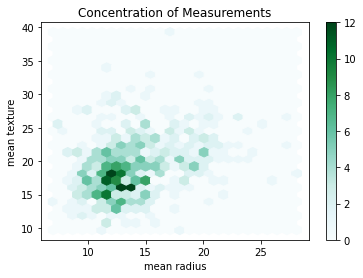

In [13]:
st.sidebar.markdown("### Hexbin Chart: Explore Concentration of Measurements :")

hexbin_x_axis = st.sidebar.selectbox("Hexbin-X-Axis", measurements, index=0)
hexbin_y_axis = st.sidebar.selectbox("Hexbin-Y-Axis", measurements, index=1)

if hexbin_x_axis and hexbin_y_axis:
    hexbin_fig = plt.figure(figsize=(6,4))

    hexbin_ax = hexbin_fig.add_subplot(111)

    breast_cancer_df.plot.hexbin(x=hexbin_x_axis, y=hexbin_y_axis,
                                 reduce_C_function=np.mean,
                                 gridsize=25,
                                 #cmap="Greens",
                                 ax=hexbin_ax, title="Concentration of Measurements");

In [14]:
## LAYOUT APPLICATION

In [15]:
container1 = st.container()
col1, col2 = st.columns(2)

with container1:
    with col1:
        scatter_fig
    with col2:
        bar_fig


container2 = st.container()
col3, col4 = st.columns(2)

with container2:
    with col3:
        hist_fig
    with col4:
        hexbin_fig